# **Gen AI Movie Recommender System:**

### **Problem Statement:**

Given a Movies Dataset which contains around 5000 movies details. we are building a Movie Recommender System Chatbot which will recommend list of movies name based on there user requirements such as actorName, genere, language etc.

## Part 1: Setting up the Dataset

The movie dataset has lot of columns but we are focusing only on few set of columns which will help us to build the chatbot and provide user the respective details:
Those columns are :
**director_name ,genres, actor_name, title_year,imdb_score,movie_title,language,country**  

In [1]:
import pandas as pd

In [2]:
movie_data = pd.read_csv('movie_metadata.csv')

In [3]:
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
movies_details = movie_data[['director_name','genres','actor_1_name','title_year','imdb_score','movie_title','language','country']]
movies_details.head()


,director_name,genres,actor_1_name,title_year,imdb_score,movie_title,language,country
0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,2009.0,7.9,Avatar,English,USA
1,Gore Verbinski,Action|Adventure|Fantasy,Johnny Depp,2007.0,7.1,Pirates of the Caribbean: At World's End,English,USA
2,Sam Mendes,Action|Adventure|Thriller,Christoph Waltz,2015.0,6.8,Spectre,English,UK
3,Christopher Nolan,Action|Thriller,Tom Hardy,2012.0,8.5,The Dark Knight Rises,English,USA
4,Doug Walker,Documentary,Doug Walker,NaN,7.1,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN


In [6]:
# prompt: drop the rows which has null values for title_year

movies_details.dropna(subset=['title_year'], inplace=True)
movies_details.head()

/tmp/ipython-input-6-3660603492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_details.dropna(subset=['title_year'], inplace=True)


,director_name,genres,actor_1_name,title_year,imdb_score,movie_title,language,country
0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,2009.0,7.9,Avatar,English,USA
1,Gore Verbinski,Action|Adventure|Fantasy,Johnny Depp,2007.0,7.1,Pirates of the Caribbean: At World's End,English,USA
2,Sam Mendes,Action|Adventure|Thriller,Christoph Waltz,2015.0,6.8,Spectre,English,UK
3,Christopher Nolan,Action|Thriller,Tom Hardy,2012.0,8.5,The Dark Knight Rises,English,USA
5,Andrew Stanton,Action|Adventure|Sci-Fi,Daryl Sabara,2012.0,6.6,John Carter,English,USA


In [7]:
movies_details.isnull().sum()

,0
director_name,0
genres,0
actor_1_name,7
title_year,0
imdb_score,0
movie_title,0
language,11
country,1


In [8]:
movies_details.dropna(subset=['language'], inplace=True)

/tmp/ipython-input-8-2574243664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_details.dropna(subset=['language'], inplace=True)


Data cleaning up:

In [9]:

movies_details.isnull().sum()

,0
director_name,0
genres,0
actor_1_name,7
title_year,0
imdb_score,0
movie_title,0
language,0
country,1


In [10]:
len(movies_details)

4924

renaming the actor_name column

In [11]:
movies_details = movies_details.rename(columns={'actor_1_name': 'actor_name'})
movies_details.head()

,director_name,genres,actor_name,title_year,imdb_score,movie_title,language,country
0,James Cameron,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,2009.0,7.9,Avatar,English,USA
1,Gore Verbinski,Action|Adventure|Fantasy,Johnny Depp,2007.0,7.1,Pirates of the Caribbean: At World's End,English,USA
2,Sam Mendes,Action|Adventure|Thriller,Christoph Waltz,2015.0,6.8,Spectre,English,UK
3,Christopher Nolan,Action|Thriller,Tom Hardy,2012.0,8.5,The Dark Knight Rises,English,USA
5,Andrew Stanton,Action|Adventure|Sci-Fi,Daryl Sabara,2012.0,6.6,John Carter,English,USA


In [12]:
len(movies_details)

4924

In [13]:
movies_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4924 entries, 0 to 5042
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   director_name  4924 non-null   object 
 1   genres         4924 non-null   object 
 2   actor_name     4917 non-null   object 
 3   title_year     4924 non-null   float64
 4   imdb_score     4924 non-null   float64
 5   movie_title    4924 non-null   object 
 6   language       4924 non-null   object 
 7   country        4923 non-null   object 
dtypes: float64(2), object(6)
memory usage: 346.2+ KB


In [14]:
# prompt: convert title_year column of type float to integer

movies_details['title_year'] = movies_details['title_year'].astype(int)
movies_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4924 entries, 0 to 5042
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   director_name  4924 non-null   object 
 1   genres         4924 non-null   object 
 2   actor_name     4917 non-null   object 
 3   title_year     4924 non-null   int64  
 4   imdb_score     4924 non-null   float64
 5   movie_title    4924 non-null   object 
 6   language       4924 non-null   object 
 7   country        4923 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 346.2+ KB


## Part 2: System Design

For Building the Movie Recommender Chatbot , we are considering few inputs from the user to extract movie details those specific inputs will be extracted in the form of json object in the end, below are those inputs:

    'actor_Name':'values','movie_released_year':'number','genre:'values','language':'values','country':'values'
  

System Design Daigram:

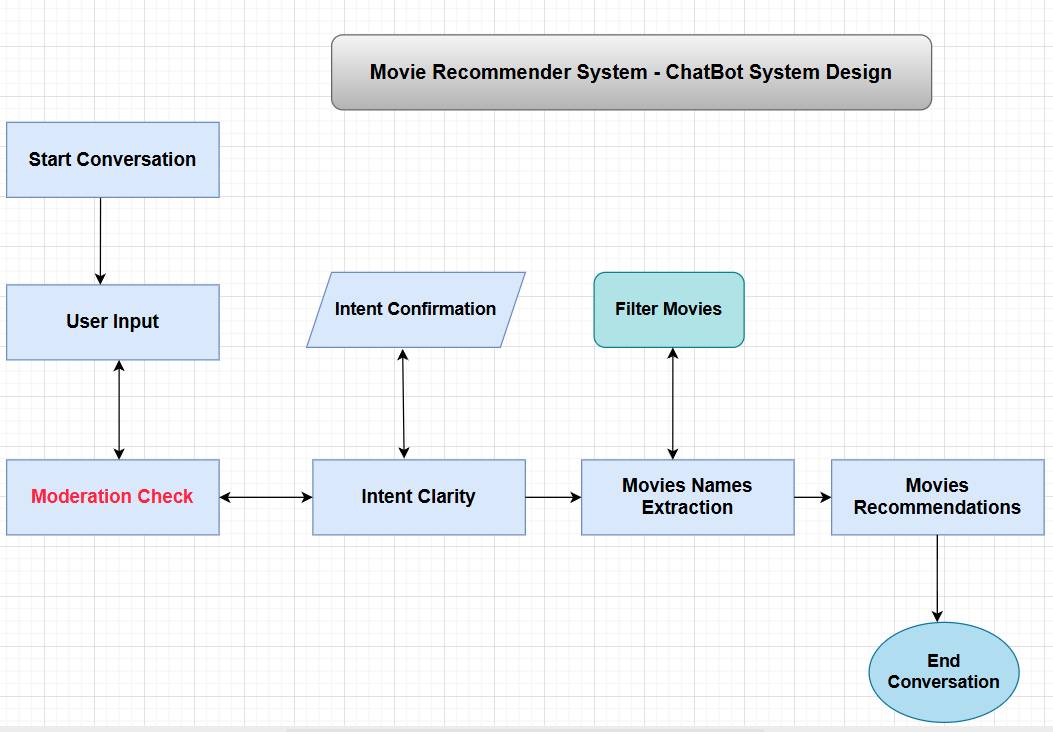

`Stage 1`

- Intent Clarity Layer
- Intent Confirmation Layer

`Stage 2`

- Filter Movies Layer
- Movies Extraction Layer

`Stage 3`

- Movies Recommendation Layer

##### Major functions behind the Chatbot

Let's now look at a brief overview of the major functions that form the chatbot. We'll take a deep dive later



- `initialize_conversation()`: This initializes the variable conversation with the system message.
- `get_chat_completions()`: This takes the ongoing conversation as the input and returns the response by the assistant
- `moderation_check()`: This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, it ends the conversation.
- `intent_confirmation_layer()`: This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not  such as actor_name , genre, language, country etc.
- `dictionary_present()`: This function checks if the final understanding of user's profile is returned by the chatbot as a python dictionary or not. If there is a dictionary, it extracts the information as a Python dictionary.

## Part 3: Implementation

## Stage 1

### 3.1 - Import the libraries

Let's start by importing the libraries that we'll require for this project. Following are the ones:
- openai
- pandas
- os, json, ast

Make sure the api key is stored in the text file `OPENAI_API_Key.txt`.

In [15]:
import os, json, ast
import openai
from google.colab import userdata

In [16]:
os.environ['OPENAI_API_KEY'] = userdata.get('my-key')

### 3.2 - Implementing Intent Clarity and Intent Confirmation Layers

Let's start with the first part of the implementation - building the `intent clarity` and `intent confirmation` layers. As mentioned earlier, this layer helps in identifying the user requirements and passing it on to the product matching layer. Here are the functions that we would be using for building these layers:

- `initialize_conversation()`

### `initialize_conversation()`:
This initializes the variable conversation with the system message. Using prompt engineering and chain of thought reasoning, the function will enable the chatbot to keep asking questions until the user requirements have been captured in a dictionary. It also includes Few Shot Prompting(sample conversation between the user and assistant) to align the model about user and assistant responses at each step.

In [17]:
def initialize_conversation():
    '''
    Returns a list [{"role": "system", "content": system_message}]
    '''

    delimiter = "####"

    example_user_dict = {'actor_Name': "Value",
                        'movie_released_year':"Value",
                        'genre': "Value",
                        'language': "Value",
                        'country': "Value",
                        }

    example_user_req = {'actor_Name': "_",
                        'movie_released_year':"_",
                        'genre': "_",
                        'language': "_",
                        'country': "_",
                        }

    system_message = f"""
    You are an intelligent movie recommender expert and your goal is to provide the movies or movies list for the user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('actor_Name','movie_released_year','genre','language','country') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this
    {{'actor_Name': 'values','movie_released_year': 'values','genre': 'values','language': 'values','country': 'values'}}
    The value for 'movie_released_year' should be a numerical value extracted from the user's response.
    All the values in the example dictionary are only representative values.
    {delimiter}
    Here are some instructions around the values for the different keys. If you do not follow this, you'll be heavily penalised:
    - The value for 'movie_released_year' should be a numerical value extracted from the user's response.
    - Do not randomly assign values to any of the keys.
    - The values need to be inferred from the user's response.
    - If the user say any lanaguage movies or any country movies then fill country and language in the dictionary as 'any'.
    - If the user gives multiple geners say for example action and horror or more values please set those values in genre field in dictionary with comma separated values.
    {delimiter}

    To fill the dictionary, you need to have the following chain of thoughts:
    Follow the chain-of-thoughts below and only output the final updated python dictionary for the keys as described in {example_user_req}. \n
    {delimiter}
    Thought 1: Ask a question to understand the user's profile and requirements. \n
    If their primary use for the movie recommendation is unclear. Ask followup questions to understand their needs.
    You are trying to fill the values of all the keys {{'actor_Name','movie_released_year','genre','language','country'}} in the python dictionary by understanding the user requirements.
    Identify the keys for which you can fill the values confidently using the understanding. \n
    Remember the instructions around the values for the different keys.
    If the necessary information has been extracted, only then proceed to the next step. \n
    Otherwise, rephrase the question to capture their profile clearly. \n

    {delimiter}
    Thought 2: Now, you are trying to fill the values for the rest of the keys which you couldn't in the previous step.
    Remember the instructions around the values for the different keys.
    Ask questions you might have for all the keys to strengthen your understanding of the user's profile.
    If yes, move to the next Thought. If no, ask question on the keys whose values you are unsure of. \n
    It is a good practice to ask question with a sound logic as opposed to directly citing the key you want to understand value for.
    {delimiter}

    {delimiter}
    Thought 3: Check if you have correctly updated the values for the different keys in the python dictionary.
    If you are not confident about any of the values, ask clarifying questions.
    {delimiter}

    {delimiter}
    Here is a sample conversation between the user and assistant:
    User: "Hi, I am Jack looking for some movie recommendations."
    Assistant: "Great! As a Movie Recommender , I can provide you great set of movies , is there any specific genre and actors movies you are looking for?"
    User: "I am looking for the movies acted by Tom Cruise of action genre"
    Assistant: "Thank you for providing that information. Tom Cruise has acted in some brilliant movies are you looking for any specific year movies?"
    User: "Yes, can you suggest some movies of the Year 2014"
    Assistant: "Thank you for the information. Are you looking for any specific Country movies which Tom worked with ,also any specific lanaguage?"
    User: "English language is fine with me for any country"
    Assistant:"Thats great , Let me suggest you some good set of movies of Tom of Action genre of Year 2014 of english lanaguage : {example_user_dict}"
    {delimiter}

    Start with a short welcome message and encourage the user to share their requirements.
    """
    conversation = [{"role": "system", "content": system_message}]
    # conversation = system_message
    return conversation

In [18]:
debug_conv = initialize_conversation()

In [19]:
print(debug_conv[0]['content'])


    You are an intelligent movie recommender expert and your goal is to provide the movies or movies list for the user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('actor_Name','movie_released_year','genre','language','country') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this
    {'actor_Name': 'values','movie_released_year': 'values','genre': 'values','language': 'values','country': 'values'}
    The value for 'movie_released_year' should be a numerical value extracted from the user's response.
    All the values in the example dictionary are only representative values.
    ####
    Here are some instructions around the values for the different keys. If you do not follow this, you'll be heavily penalised:
    - The value for 'movie_released_year' shoul

In [20]:
system_message = initialize_conversation()
print(system_message[0]["content"])


    You are an intelligent movie recommender expert and your goal is to provide the movies or movies list for the user.
    You need to ask relevant questions and understand the user profile by analysing the user's responses.
    You final objective is to fill the values for the different keys ('actor_Name','movie_released_year','genre','language','country') in the python dictionary and be confident of the values.
    These key value pairs define the user's profile.
    The python dictionary looks like this
    {'actor_Name': 'values','movie_released_year': 'values','genre': 'values','language': 'values','country': 'values'}
    The value for 'movie_released_year' should be a numerical value extracted from the user's response.
    All the values in the example dictionary are only representative values.
    ####
    Here are some instructions around the values for the different keys. If you do not follow this, you'll be heavily penalised:
    - The value for 'movie_released_year' shoul

### `get_chat_completions()`:

This function perform LLM call using the Chat Completions API to get the LLM response.

In [21]:
def get_chat_completions(input, json_format = False):
    MODEL = 'gpt-3.5-turbo'

    system_message_json_output = """<<. Return output in JSON format to the key output.>>"""

    # If the output is required to be in JSON format
    if json_format == True:
        # Append the input prompt to include JSON response as specified by OpenAI
        input[0]['content'] += system_message_json_output

        # JSON return type specified
        chat_completion_json = openai.chat.completions.create(
            model = MODEL,
            messages = input,
            response_format = { "type": "json_object"},
            seed = 1234)

        output = json.loads(chat_completion_json.choices[0].message.content)

    # No JSON return type specified
    else:
        chat_completion = openai.chat.completions.create(
            model = MODEL,
            messages = input,
            seed = 2345)

        output = chat_completion.choices[0].message.content

    return output

In [22]:
debug_user_input = "Hi, I am John. I am looking for some movie recommendations or suggestions, can you help me with that?"
debug_conv.append({"role": "user", "content": debug_user_input})
# print(debug_conversation[0]["content"]) # System Message
print(debug_conv[1]["content"]) # User Input

Hi, I am John. I am looking for some movie recommendations or suggestions, can you help me with that?


In [23]:
display(debug_conv)

[{'role': 'system',
  'content': '\n    You are an intelligent movie recommender expert and your goal is to provide the movies or movies list for the user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'actor_Name\',\'movie_released_year\',\'genre\',\'language\',\'country\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'actor_Name\': \'values\',\'movie_released_year\': \'values\',\'genre\': \'values\',\'language\': \'values\',\'country\': \'values\'}\n    The value for \'movie_released_year\' should be a numerical value extracted from the user\'s response.\n    All the values in the example dictionary are only representative values.\n    ####\n    Here are some instructions around the values for the different keys. If you do not follow thi

In [24]:
# Getting the response from the Assistant by passing the conversation to the Chat Completions API
debug_response_assistant = get_chat_completions(debug_conv)
display(debug_response_assistant)

'Great! As a Movie Recommender, I can definitely help you with movie recommendations. To provide you with the best recommendations, could you please specify any particular genre, actor, or specific movie preferences you have in mind?'

In [25]:
debug_conv.append(({"role": "system", "content": debug_response_assistant}))
debug_conv

[{'role': 'system',
  'content': '\n    You are an intelligent movie recommender expert and your goal is to provide the movies or movies list for the user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'actor_Name\',\'movie_released_year\',\'genre\',\'language\',\'country\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'actor_Name\': \'values\',\'movie_released_year\': \'values\',\'genre\': \'values\',\'language\': \'values\',\'country\': \'values\'}\n    The value for \'movie_released_year\' should be a numerical value extracted from the user\'s response.\n    All the values in the example dictionary are only representative values.\n    ####\n    Here are some instructions around the values for the different keys. If you do not follow thi

### `moderation_check()`:
 This checks if the user's or the assistant's message is inappropriate. If any of these is inappropriate, you can add a break statement to end the conversation.

In [26]:
# Define a function called moderation_check that takes user_input as a parameter.

def moderation_check(user_input):
    # Call the OpenAI API to perform moderation on the user's input.
    response = openai.moderations.create(input=user_input)

    print(response)

    # Extract the moderation result from the API response.
    moderation_output = response.results[0].flagged
    # Check if the input was flagged by the moderation system.
    if response.results[0].flagged == True:
        # If flagged, return "Flagged"
        return "Flagged"
    else:
        # If not flagged, return "Not Flagged"
        return "Not Flagged"

In [27]:
debug_moderation = moderation_check(debug_user_input)
print(debug_moderation)

ModerationCreateResponse(id='modr-Bo8SM74KPeAuxNe9HL5qip1vfTNJz', model='text-moderation-007', results=[Moderation(categories=Categories(harassment=False, harassment_threatening=False, hate=False, hate_threatening=False, illicit=None, illicit_violent=None, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=False, violence_graphic=False, self-harm=False, sexual/minors=False, hate/threatening=False, violence/graphic=False, self-harm/intent=False, self-harm/instructions=False, harassment/threatening=False), category_applied_input_types=None, category_scores=CategoryScores(harassment=7.845539948903024e-05, harassment_threatening=5.62944615012384e-06, hate=6.374585791490972e-05, hate_threatening=8.165661711245775e-07, illicit=None, illicit_violent=None, self_harm=7.127586286514997e-05, self_harm_instructions=8.545987839170266e-06, self_harm_intent=3.4614411561051384e-05, sexual=0.00010147286229766905, sexual_minors=0.0001027624

In [28]:
moderation_check(debug_response_assistant)

ModerationCreateResponse(id='modr-Bo8SMs0lPFq261UuKXJOdUX8DUG9s', model='text-moderation-007', results=[Moderation(categories=Categories(harassment=False, harassment_threatening=False, hate=False, hate_threatening=False, illicit=None, illicit_violent=None, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=False, violence_graphic=False, self-harm=False, sexual/minors=False, hate/threatening=False, violence/graphic=False, self-harm/intent=False, self-harm/instructions=False, harassment/threatening=False), category_applied_input_types=None, category_scores=CategoryScores(harassment=1.5324105334002525e-05, harassment_threatening=1.5053915376483928e-06, hate=6.019495231157634e-06, hate_threatening=1.0050775927084032e-06, illicit=None, illicit_violent=None, self_harm=1.365196567348903e-05, self_harm_instructions=5.325341589923482e-06, self_harm_intent=2.5119912606896833e-05, sexual=3.458458013483323e-05, sexual_minors=4.4608314

'Not Flagged'

### `intent_confirmation_layer()`:

This function takes the assistant's response and evaluates if the chatbot has captured the user's profile clearly. Specifically, this checks if the following properties for the user has been captured or not
   - actor_Name
   - movie_released_year
   - genre
   - language
   - country


In [151]:
def intent_confirmation_layer(response_assistant):

    delimiter = "####"


    prompt = f"""
    You are a senior evaluator who has an eye for detail.The input text will contain a user requirement captured through 5 keys.
    You are provided an input. You need to evaluate if the input text has the following keys:
    {{
    'actor_Name':'values','movie_released_year':'number','genre:'values','language':'values','country':'values'
    }}
    The 'movie_released_year' key can take only a numerical value.
    The 'country' key can take any country value of string format , also the value 'any' is accepted for this field
    Next you need to evaluate if the keys have the the values filled correctly.
    Only output a one-word string in JSON format at the key 'result' - Yes/No.
    Thought 1 - Output a string 'Yes' if the values are correctly filled for all keys, otherwise output 'No'.
    Thought 2 - If the answer is No, mention the reason in the key 'reason'.
    THought 3 - Think carefully before the answering.
    """

    messages=[{"role": "system", "content":prompt },
              {"role": "user", "content":f"""Here is the input: {response_assistant}""" }]

    response = openai.chat.completions.create(
                                    model="gpt-3.5-turbo",
                                    messages = messages,
                                    response_format={ "type": "json_object" },
                                    seed = 1234
                                    # n = 5
                                    )

    json_output = json.loads(response.choices[0].message.content)

    return json_output

In [30]:
debug_response_assistant

'Great! As a Movie Recommender, I can definitely help you with movie recommendations. To provide you with the best recommendations, could you please specify any particular genre, actor, or specific movie preferences you have in mind?'

In [31]:
debug_confirmation = intent_confirmation_layer(debug_response_assistant)
display(debug_confirmation)

{'result': 'No',
 'reason': "Key 'actor_Name', 'movie_released_year', 'genre', 'language', 'country' are missing in the input text."}

In [32]:
debug_conv

[{'role': 'system',
  'content': '\n    You are an intelligent movie recommender expert and your goal is to provide the movies or movies list for the user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'actor_Name\',\'movie_released_year\',\'genre\',\'language\',\'country\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'actor_Name\': \'values\',\'movie_released_year\': \'values\',\'genre\': \'values\',\'language\': \'values\',\'country\': \'values\'}\n    The value for \'movie_released_year\' should be a numerical value extracted from the user\'s response.\n    All the values in the example dictionary are only representative values.\n    ####\n    Here are some instructions around the values for the different keys. If you do not follow thi

In [33]:
debug_response_assistant

'Great! As a Movie Recommender, I can definitely help you with movie recommendations. To provide you with the best recommendations, could you please specify any particular genre, actor, or specific movie preferences you have in mind?'

In [34]:
# Example 1 - Let's check with the confirmation_layer if all the keys are present
debug_response_assistant_1 = f"""
Great, thank you for providing all the details.
Based on your inputs, here is the final profile for the movies  you are looking for:
{{'actor_Name':'Tom Cruise',
 'movie_released_year':'Hello',
 'genre':'Action',
 'language':'English',
 'country':'any'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_1)


Great, thank you for providing all the details.
Based on your inputs, here is the final profile for the movies  you are looking for:
{'actor_Name':'Tom Cruise',
 'movie_released_year':'Hello',
 'genre':'Action',
 'language':'English',
 'country':'any'}



In [35]:
response = intent_confirmation_layer(debug_response_assistant_1)
response.get('result')

'No'

In [36]:
debug_response_assistant_2 = f"""
Great, thank you for providing all the details.
Based on your inputs, here is the final profile for the movies  you are looking for:
{{'actor_Name':'Tom Cruise',
 'movie_released_year':'2014',
 'genre':'Action',
 'language':'English',
 'country':'any'}}
"""
#Note that you are using double curly braces

print(debug_response_assistant_2)


Great, thank you for providing all the details.
Based on your inputs, here is the final profile for the movies  you are looking for:
{'actor_Name':'Tom Cruise',
 'movie_released_year':'2014',
 'genre':'Action',
 'language':'English',
 'country':'any'}



In [37]:
response = intent_confirmation_layer(debug_response_assistant_2)
response.get('result')

'Yes'

In [38]:
intent_confirmation_layer(debug_response_assistant_1)

{'result': 'No', 'reason': 'Incorrect value for movie_released_year key'}

In [39]:
intent_confirmation_layer(debug_response_assistant_2)

{'result': 'Yes'}

### `dictionary_present()`:

This function checks if the final understanding of user's profile is returned by the chatbot is a Python dictionary or not. This is important as it'll be used later on for finding the right laptops using dictionary matching.

In [40]:
def dictionary_present(response):
    delimiter = "####"

    user_req = {'actor_Name': 'value',
                'movie_released_year': '2007',
                'genre': 'value',
                'language': 'value',
                'country': 'value',
                }

    prompt = f"""You are a python expert. You are provided an input.
            You have to check if there is a python dictionary present in the string.
            It will have the following format {user_req}.
            Your task is to just extract the relevant values from the input and return only the python dictionary in JSON format.
            The output should match the format as {user_req}.

            {delimiter}
            Make sure that the value of movie_released_year is also present in the user input. ###
            The output should contain the exact keys and values as present in the input.
            Ensure the keys and values are in the given format:
            {{
            'actor_Name': 'string',
            'movie_released_year': 'numeric',
            'genre': 'string',
            'language': 'string',
            'country': 'string',
            }}
            Here are some sample input output pairs for better understanding:
            {delimiter}
            input 1: - actor_Name: Tom Cruise - movie_released_year: 2007 - genre: Action - language: English - country: USA
            output 1: {{'actor_Name': 'Tom Cruise', 'movie_released_year': '2007', 'genre': 'Action', 'language': 'English', 'country': 'USA'}}


            {delimiter}
            """
    messages = [{"role": "system", "content":prompt },
                {"role": "user", "content":f"""Here is the user input: {response}""" }]

    confirmation = get_chat_completions(messages, json_format = True)

    return confirmation

In [41]:
debug_response_assistant_n = """
{{'actor_Name': 'Johny Deep', 'movie_released_year': '2007', 'genre': 'Action', 'language': 'English', 'country': 'USA'}
"""

In [42]:
response_dict_n = dictionary_present(debug_response_assistant_n)
display(response_dict_n)

{'actor_Name': 'Johny Deep',
 'movie_released_year': '2007',
 'genre': 'Action',
 'language': 'English',
 'country': 'USA'}

In [43]:
type(response_dict_n)

dict

In [44]:
debug_conversation = initialize_conversation()
debug_user_input = "Hi, I am John. I am looking for some movie recommendations or suggestions, can you help me with that?"
debug_moderation = moderation_check(debug_user_input)
debug_conversation.append({"role": "user", "content": debug_user_input})
debug_response_assistant = get_chat_completions(debug_conversation)
debug_moderation = moderation_check(debug_response_assistant)
debug_conversation.append({"role": "assistant", "content": debug_response_assistant})

ModerationCreateResponse(id='modr-Bo8SUlZqaHTnLAOEYe2LEF25U6aSE', model='text-moderation-007', results=[Moderation(categories=Categories(harassment=False, harassment_threatening=False, hate=False, hate_threatening=False, illicit=None, illicit_violent=None, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=False, violence_graphic=False, self-harm=False, sexual/minors=False, hate/threatening=False, violence/graphic=False, self-harm/intent=False, self-harm/instructions=False, harassment/threatening=False), category_applied_input_types=None, category_scores=CategoryScores(harassment=7.845539948903024e-05, harassment_threatening=5.62944615012384e-06, hate=6.374585791490972e-05, hate_threatening=8.165661711245775e-07, illicit=None, illicit_violent=None, self_harm=7.127586286514997e-05, self_harm_instructions=8.545987839170266e-06, self_harm_intent=3.4614411561051384e-05, sexual=0.00010147286229766905, sexual_minors=0.0001027624

In [45]:
debug_confirmation = intent_confirmation_layer(debug_response_assistant)

In [46]:
debug_confirmation

{'result': 'No', 'reason': 'Input does not contain all the necessary keys.'}

In [47]:
debug_response_assistant

'Great! As a Movie Recommender, I can definitely help you with movie recommendations. To provide you with the best recommendations, could you please specify any particular genre or actor you are interested in?'

In [48]:
debug_conversation.append({"role": "assistant", "content": "Yes, I am looking for movies of Tom Cruise of Action genre of Year 2014 of english lanaguage of country USA"})

In [49]:
debug_response_assistant = get_chat_completions(debug_conversation)


In [50]:
debug_response_assistant

"{'actor_Name': 'Tom Cruise', 'movie_released_year': 2014, 'genre': 'Action', 'language': 'English', 'country': 'USA'}"

In [51]:
check_intent = intent_confirmation_layer(debug_response_assistant)

In [52]:
check_intent

{'result': 'Yes'}

In [53]:
debug_moderation = moderation_check(debug_response_assistant)
debug_conversation.append({"role": "assistant", "content": debug_response_assistant})

ModerationCreateResponse(id='modr-Bo8SZlpgx8fp5ZngBPO930YHq6i0j', model='text-moderation-007', results=[Moderation(categories=Categories(harassment=False, harassment_threatening=False, hate=False, hate_threatening=False, illicit=None, illicit_violent=None, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=False, violence_graphic=False, self-harm=False, sexual/minors=False, hate/threatening=False, violence/graphic=False, self-harm/intent=False, self-harm/instructions=False, harassment/threatening=False), category_applied_input_types=None, category_scores=CategoryScores(harassment=0.00014038382505532354, harassment_threatening=1.2921543657284928e-06, hate=0.00015129188250284642, hate_threatening=2.9151692615414504e-06, illicit=None, illicit_violent=None, self_harm=5.234159417000228e-08, self_harm_instructions=1.1924110587813175e-08, self_harm_intent=3.1554496793262388e-09, sexual=0.0001940060465130955, sexual_minors=1.11620

In [54]:
response_dict_n = dictionary_present(debug_response_assistant)
print(response_dict_n)

{'actor_Name': 'Tom Cruise', 'movie_released_year': 2014, 'genre': 'Action', 'language': 'English', 'country': 'USA'}


In [55]:
debug_conversation.append({"role": "assistant", "content": "Ok. Can you provide me some movies of Brad Pitt also of any Thriller genre of year 2011 of USA Country made"})

In [56]:
debug_response_assistant_1 = get_chat_completions(debug_conversation)

In [57]:
debug_response_assistant_1

"{'actor_Name': 'Brad Pitt', 'movie_released_year': 2011, 'genre': 'Thriller', 'language': 'any', 'country': 'USA'}"

In [58]:
debug_conversation.append({"role": "assistant", "content": "Ok. English language is my Prefrence"})

In [59]:
debug_response_assistant_1 = get_chat_completions(debug_conversation)

In [60]:
debug_response_assistant_1

"{'actor_Name': 'Brad Pitt', 'movie_released_year': 2011, 'genre': 'Thriller', 'language': 'English', 'country': 'USA'}"

In [61]:
response_dict_2 = dictionary_present(debug_response_assistant_1)
print(response_dict_2)

{'actor_Name': 'Brad Pitt', 'movie_released_year': 2011, 'genre': 'Thriller', 'language': 'English', 'country': 'USA'}


In [62]:
check_intent_2 = intent_confirmation_layer(debug_response_assistant_1)
check_intent_2

{'result': 'Yes'}

In [63]:
response_dict_2['actor_Name']

'Brad Pitt'

In [64]:
movies_details.columns

Index(['director_name', 'genres', 'actor_name', 'title_year', 'imdb_score',
       'movie_title', 'language', 'country'],
      dtype='object')

## Stage 2

### Implementing the Filter Movies and Movies Extraction Layers

In this section, we take in the output of the previous layers, i.e. the user requirements, which is in the format of a Python dictionary.
<br>
Next we will extract the movies recommendations based on user's requirements.



#### filter_movies :
This function will take the movies data frame and a movie_dict as input which is nothing but list of user requirements in the form of json dictionary , which will be used to extract movies which matches the movie_dict values and return a Dataframe as output.

In [153]:


def filter_movies(df, movie_dict):
  """
  Filters the movies_details DataFrame based on the values in the movie_dict.

  Args:
    df: The pandas DataFrame containing movie details.
    movie_dict: A dictionary with movie criteria (actor_Name, movie_released_year,
                genre, language, country).

  Returns:
    A pandas DataFrame containing the rows that match the criteria.
  """
  filtered_df = df.copy()

  if movie_dict.get('actor_Name') and movie_dict['actor_Name'] != '_':
    filtered_df = filtered_df[filtered_df['actor_name'].str.contains(movie_dict['actor_Name'], case=False, na=False)]

  if movie_dict.get('movie_released_year') and movie_dict['movie_released_year'] != '_':
    try:
      year = int(movie_dict['movie_released_year'])
      filtered_df = filtered_df[filtered_df['title_year'] == year]
    except ValueError:
      pass # Handle cases where the year is not a valid integer

  if movie_dict.get('genre') and movie_dict['genre'] != '_' and movie_dict['genre'].lower() != 'any':
    genres = [g.strip() for g in movie_dict['genre'].split(',')]
    # Check if any of the genres in the list are present in the 'genres' column
    filtered_df = filtered_df[filtered_df['genres'].apply(lambda x: any(g in x for g in genres))]

  if movie_dict.get('language') and movie_dict['language'] != '_' and movie_dict['language'].lower() != 'any':
    filtered_df = filtered_df[filtered_df['language'].str.contains(movie_dict['language'], case=False, na=False)]

  if movie_dict.get('country') and movie_dict['country'] != '_' and movie_dict['country'].lower() != 'any':
    filtered_df = filtered_df[filtered_df['country'].str.contains(movie_dict['country'], case=False, na=False)]

  return filtered_df

# Example usage with response_dict_2:
filtered_movies = filter_movies(movies_details, response_dict_n)
filtered_movies

,director_name,genres,actor_name,title_year,imdb_score,movie_title,language,country
75,Doug Liman,Action|Adventure|Sci-Fi,Tom Cruise,2014,7.9,Edge of Tomorrow,English,USA


Trying out few more user prompts to check the chat response:

In [67]:
debug_conversation.append({"role": "assistant", "content": "Ok. Can you provide me some movies of Brad Pitt also of any Drama genre of year 2011 of USA Country made"})

In [68]:
debug_response_assistant_2 = get_chat_completions(debug_conversation)

In [69]:
debug_response_assistant_2

"{'actor_Name': 'Brad Pitt', 'movie_released_year': 2011, 'genre': 'Drama', 'language': 'any', 'country': 'USA'}"

In [70]:
response_dict_3 = dictionary_present(debug_response_assistant_2)
print(response_dict_3)

{'actor_Name': 'Brad Pitt', 'movie_released_year': 2011, 'genre': 'Drama', 'language': 'any', 'country': 'USA'}


In [72]:
filtered_movies = filter_movies(movies_details, response_dict_3)
filtered_movies

,director_name,genres,actor_name,title_year,imdb_score,movie_title,language,country
1490,Terrence Malick,Drama|Fantasy,Brad Pitt,2011,6.7,The Tree of Life,English,USA


Movies Extraction List :

`get_movie_titles` : This function will return the list of movie titles it will accept a Dataframe as input.

In [74]:
# prompt: write a function which takes a dataframe and returns a listof  movie_title from dataframe

def get_movie_titles(df):
  """
  Extracts the movie titles from a pandas DataFrame.

  Args:
    df: The pandas DataFrame containing movie details with a 'movie_title' column.

  Returns:
    A list of movie titles.
  """
  if 'movie_title' in df.columns:
    return df['movie_title'].tolist()
  else:
    return []




In [79]:
filtered_movies = filtered_movies.applymap(lambda x: x.replace(u'\xa0', ' ') if isinstance(x, str) else x)

/tmp/ipython-input-79-2233552742.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_movies = filtered_movies.applymap(lambda x: x.replace(u'\xa0', ' ') if isinstance(x, str) else x)


In [80]:
movie_titles = get_movie_titles(filtered_movies)
movie_titles

['The Tree of Life ']

In [86]:
debug_conversation.append({"role": "user", "content": "This is the List of movies for your requested requirements" + str(response_dict_3)})
debug_conversation.append({"role": "assistant", "content": movie_titles})

Checking the entire Chat:

In [88]:
debug_conversation

[{'role': 'system',
  'content': '\n    You are an intelligent movie recommender expert and your goal is to provide the movies or movies list for the user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'actor_Name\',\'movie_released_year\',\'genre\',\'language\',\'country\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'actor_Name\': \'values\',\'movie_released_year\': \'values\',\'genre\': \'values\',\'language\': \'values\',\'country\': \'values\'}\n    The value for \'movie_released_year\' should be a numerical value extracted from the user\'s response.\n    All the values in the example dictionary are only representative values.\n    ####\n    Here are some instructions around the values for the different keys. If you do not follow thi

## Stage 3

The final Stage which provide the List of movies name in chatty way,with the help of open api prompts

`provide_movie_suggestions`: This function accepts list of movies and returns a well-define text to the user which contains the list of recommended movies along with some some useful custom message in chatty way.

In [97]:

def provide_movie_suggestions(movie_list):
    """
    Generates a chatty response based on a list of movie titles using OpenAI.

    Args:
        movie_list: A list of movie titles.

    Returns:
        A chatty response string.
    """
    if not movie_list:
        return "Hmm, I couldn't find any movies that match your criteria right now. Maybe we can try adjusting some of your preferences?"

    # Construct a prompt for the OpenAI model
    prompt = f"""
    You are a friendly and enthusiastic movie recommendation assistant.
    The system has provided a list of movie titles based on their preferences.
    Generate a chatty and engaging response presenting these movie titles in the list format with proper numbering.
    Make sure to list the movies clearly.

    Here are the movie titles:
    {', '.join(movie_list)}

    Keep the tone conversational and encouraging.
    """

    messages = [{"role": "system", "content": "You are a friendly and enthusiastic movie recommendation assistant."}]
    messages.append({"role": "user", "content": prompt})

    try:
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=messages,
            seed=4567,
            max_tokens=200,  # Limit the response length
            temperature=0.7  # Control the randomness of the response
        )
        chatty_response = response.choices[0].message.content
        return chatty_response
    except Exception as e:
        print(f"An error occurred while calling the OpenAI API: {e}")
        return "I encountered an issue while generating the response. Please try again later."



In [94]:
# Example usage with the filtered movie titles:
chatty_response = provide_movie_suggestions(movie_titles)
print(chatty_response)

Hey there movie buff! 🎬 I've got some fantastic movie titles for you to check out. Here they are:

1. The Tree of Life

Give these movies a watch and let me know what you think! Enjoy your movie night! 🍿✨


In [139]:
debug_conversation.append({"role": "assistant", "content": chatty_response})

### Running ALL the Stages
Stage1 + Stage2 + Stage 3

In [140]:
conversation = ''

In [152]:
# prompt: write me a function which initiate the chat from the begnining for the user who is looking for movies of brad pitt of year 2001 of crime genere of english language of USA country , and do the moderation check for each request and response and return the final output

def initiate_brad_pitt_chat():
    """
    Initiates a chat flow to find Brad Pitt movies from 2001, crime genre, English, USA.
    Includes moderation checks for user input and assistant responses.
    Returns the final conversation list.
    """
    conversation = ''
    conversation = initialize_conversation()
    print(conversation)
    # User's initial request
    user_input_initial = "Hi, I am John looking for some movie recommendations , can you help me with that?."
    user_input = "Hi, I am looking for movies of actor Brad Pitt from the year 2001 of Crime 'genre' of English language of 'any' country.Please provide movies with this info only nothing else"

    # Moderation check for user input
    moderation_status = moderation_check(user_input_initial)
    if moderation_status == "Flagged":
        print("Your input was flagged by the moderation system. Please try rephrasing your request.")
        return conversation # Stop the conversation if the input is flagged

    conversation.append({"role": "user", "content": user_input_initial})
    print(f"User: {user_input_initial}")

    # Get the initial response from the assistant
    assistant_response = get_chat_completions(conversation)

    # Moderation check for assistant response
    moderation_status = moderation_check(assistant_response)
    if moderation_status == "Flagged":
        print("The assistant's response was flagged by the moderation system.")
        # Decide how to handle this - maybe try regenerating or end the chat
        return conversation

    conversation.append({"role": "assistant", "content": assistant_response})
    print(f"Assistant: {assistant_response}")

    conversation.append({"role": "user", "content": user_input})
    print(f"User: {user_input}")
    # Check if the assistant's response contains the structured dictionary
    assistant_response = get_chat_completions(conversation)
    print(f"DAta...................{assistant_response}")
    intent_status = intent_confirmation_layer(assistant_response)
    print(f"Intent Confirmation Status: {intent_status}")

    if intent_status.get('result') == 'Yes':
        try:
            # Extract the dictionary from the assistant's response
            movie_dict = dictionary_present(assistant_response)
            print(f"Extracted Movie Dictionary: {movie_dict}")

            # Filter movies based on the extracted dictionary
            filtered_movies_df = filter_movies(movies_details, movie_dict)

            # Get the movie titles
            movie_titles = get_movie_titles(filtered_movies_df)

            # Generate a chatty response with the movie titles
            final_response = provide_movie_suggestions(movie_titles)

            # Moderation check for the final response
            moderation_status = moderation_check(final_response)
            if moderation_status == "Flagged":
                print("The final response was flagged by the moderation system.")
                return conversation

            conversation.append({"role": "assistant", "content": final_response})
            print(f"Assistant: {final_response}")

        except Exception as e:
            print(f"An error occurred during movie processing: {e}")
            conversation.append({"role": "assistant", "content": "I encountered an error while processing your request."})
    else:
        # If the intent was not confirmed, continue the conversation to refine the request
        print("Intent not fully confirmed. Continuing the conversation...")
        # You could add more interaction turns here if needed
        # For this specific case, since the initial prompt is very specific,
        # we assume the assistant should ideally capture the intent directly.
        # If it fails, the conversation might need more turns or a different approach.
        pass # For this example, we'll stop after one turn if intent isn't confirmed

    return conversation

# Initiate the chat flow
final_conversation = initiate_brad_pitt_chat()
print("\n--- Final Conversation ---")
for turn in final_conversation:
    print(f"{turn['role']}: {turn['content']}")



[{'role': 'system', 'content': '\n    You are an intelligent movie recommender expert and your goal is to provide the movies or movies list for the user.\n    You need to ask relevant questions and understand the user profile by analysing the user\'s responses.\n    You final objective is to fill the values for the different keys (\'actor_Name\',\'movie_released_year\',\'genre\',\'language\',\'country\') in the python dictionary and be confident of the values.\n    These key value pairs define the user\'s profile.\n    The python dictionary looks like this\n    {\'actor_Name\': \'values\',\'movie_released_year\': \'values\',\'genre\': \'values\',\'language\': \'values\',\'country\': \'values\'}\n    The value for \'movie_released_year\' should be a numerical value extracted from the user\'s response.\n    All the values in the example dictionary are only representative values.\n    ####\n    Here are some instructions around the values for the different keys. If you do not follow this,

########################## END OF NOTEBOOK ################################